<a href="https://colab.research.google.com/github/SHINE51278/ML/blob/main/Lab_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/gender_submission.csv") # Load dataset
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
x=df.PassengerId
y=df.Survived
print(x)


0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [ ]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)


In [ ]:
from sklearn.model_selection import train_test_split # Splitting Testing & Training
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)
print("Training samples:",x_train.shape)
print("Testing samples:",x_test.shape)

Training samples: (334, 1)
Testing samples: (84, 1)


In [ ]:
from sklearn.svm import SVC # SVC - Support Vector Classification

In [ ]:
svm_linear=SVC(kernel='poly',class_weight='balanced',C=0.01) # checkout/replace with linear,poly,rbf

In [ ]:
svm_linear.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, class_weight='balanced', kernel='poly')

In [ ]:
y_pred=svm_linear.predict(x_test)
print(y_pred)

[0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5238095238095238


In [ ]:
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,zero_division=0)
print("Precision:",precision)

Precision: 0.43478260869565216


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
print("TP  FP")
print("FN  TN")
print(cm)

Confusion Matrix:
 [[24 26]
 [14 20]]
TP  FP
FN  TN
[[24 26]
 [14 20]]


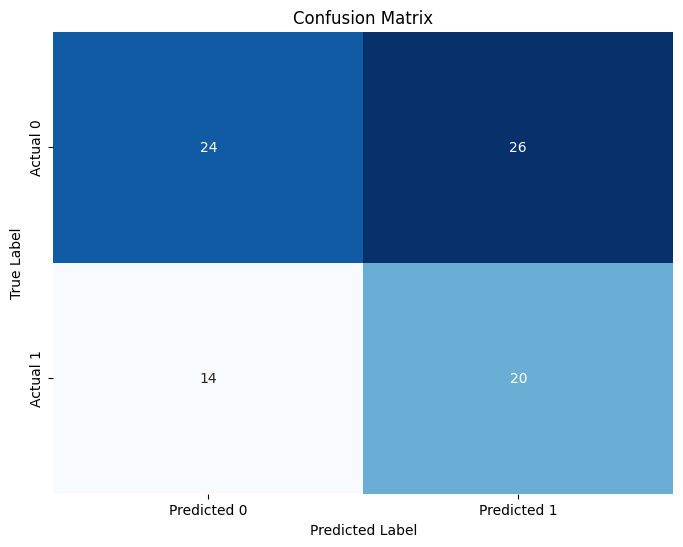

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
print("Recall:",recall)


Recall: 0.5882352941176471


In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred)
print("F1 Score:",f1)

F1 Score: 0.5
